In [2]:
from pipeline.load import MyDataset, get_dataloader
from matplotlib import pyplot as plt
import numpy as np
import requests
import pandas as pd
import json
import os
import pdb

In [10]:
dataset = MyDataset(in_dir="training_data/train")

training_data/train
training_data/train/images/*.jpg


In [11]:
dataset.images[:5]

['training_data/train/images/d41d81_14336_19456_i.jpg',
 'training_data/train/images/d41d81_1024_21504_i.jpg',
 'training_data/train/images/d41d81_20480_20480_i.jpg',
 'training_data/train/images/d41d81_31744_15360_i.jpg',
 'training_data/train/images/d41d81_24576_10240_i.jpg']

In [12]:
def display_random(image_tuple=None):
    if image_tuple==None:
        image_tuple=dataset[np.random.randint(0, len(dataset))]
    fig, ax = plt.subplots(ncols=len(image_tuple)-1)
    ax[0].imshow(image_tuple[0])
    ax[1].imshow(image_tuple[1])

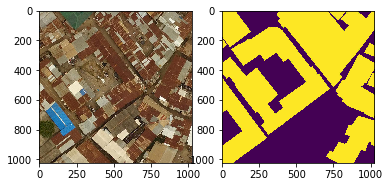

In [16]:
display_random()

ls: cannot access 'training_data/train/images': No such file or directory
0
ls: cannot access 'training_data/train/masks': No such file or directory
0


# Study Train / Test File sizes

In [3]:
scene_log = requests.get('https://raw.githubusercontent.com/thomkav/building_segmentation_cv/master/scene_log.json').json()
scene_log = pd.DataFrame.from_dict(scene_log,orient='index')
scene_log['num_blocks'] = scene_log['blocks']
scene_log.size = pd.to_numeric(scene_log.size)
scene_log.num_blocks = pd.to_numeric(scene_log.num_blocks)
scene_log.tier = pd.to_numeric(scene_log.tier)

In [19]:
scene_log[scene_log.tier == 2].scene_id.unique()

NameError: name 'scene_log' is not defined

In [ ]:
cities = set(sm.index.values)
train_regions = {'dar','kam','mon','nia','ptn','znz'}
test_regions = cities - train_regions


train_size = sm[sm.index.isin(train_regions)].size.sum()
train_num_blocks = sm[sm.index.isin(train_regions)].num_blocks.sum()

print(f'{len(train_regions)} of {len(cities)} cities used for train region')
print(f'Training regs are {round(train_size / sm.size.sum(),2)*100}% of total area')
print(f'Training regs are {round(train_num_blocks / sm.num_blocks.sum(), 2)*100}% of unique blocks')
train_sc_ids = sm[sm.index.isin(train_regions)].scene_id.unique()
test_sc_ids = sm[~sm.index.isin(train_regions)].scene_id.unique()
print('Train scene ID list:', train_sc_ids)
print('Test scene ID list:', test_sc_ids)

# Tile Counts per Scene for validation split

In [4]:
!ls 

compress_submission_data.py  Model Inspection-Copy1.ipynb  README.md
dataset_test-Copy1.ipynb     Model Inspection.ipynb	   scene_log.json
dataset_test.ipynb	     models			   submission_data
environment.yml		     nohup.out			   tmp
evaluate.py		     pipeline			   training_data
FastFCN			     project_mgmt		   train.py
LovaszSoftmax		     __pycache__		   Untitled.ipynb


In [7]:
ls = os.listdir('training_data/images')
ls

['076995_39936_31744_i.jpg',
 '75cdfa_10240_5120_i.jpg',
 '75cdfa_44032_23552_i.jpg',
 '353093_5120_13312_i.jpg',
 '425403_14336_13312_i.jpg',
 'f883a0_56320_63488_i.jpg',
 '665946_89088_50176_i.jpg',
 '665946_2048_48128_i.jpg',
 '665946_74752_34816_i.jpg',
 '665946_50176_5120_i.jpg',
 'a42435_18432_21504_i.jpg',
 'f883a0_58368_54272_i.jpg',
 '33cae6_16384_31744_i.jpg',
 '0a4c40_11264_19456_i.jpg',
 '06f252_0_19456_i.jpg',
 'a42435_17408_33792_i.jpg',
 '42f235_11264_31744_i.jpg',
 'abe1a3_1024_3072_i.jpg',
 '665946_41984_48128_i.jpg',
 'a017f9_2048_37888_i.jpg',
 '665946_51200_75776_i.jpg',
 'e52478_31744_14336_i.jpg',
 'c7415c_21504_0_i.jpg',
 'a42435_18432_19456_i.jpg',
 '75cdfa_20480_15360_i.jpg',
 'a42435_25600_37888_i.jpg',
 '0a4c40_24576_37888_i.jpg',
 '33cae6_19456_18432_i.jpg',
 '0a4c40_29696_23552_i.jpg',
 'bc32f1_17408_36864_i.jpg',
 'b15fce_27648_19456_i.jpg',
 '3f8360_18432_0_i.jpg',
 'bc32f1_1024_12288_i.jpg',
 '75cdfa_30720_27648_i.jpg',
 '076995_41984_19456_i.jpg',
 '0a4

In [8]:
from collections import Counter, defaultdict
import re

ids = [fn[:6] for fn in ls]
counts = Counter(ids)

In [9]:
counts

Counter({'076995': 1701,
         '75cdfa': 2304,
         '353093': 1364,
         '425403': 1444,
         'f883a0': 4094,
         '665946': 6982,
         'a42435': 1318,
         '33cae6': 1106,
         '0a4c40': 1604,
         '06f252': 2387,
         '42f235': 2257,
         'abe1a3': 31,
         'a017f9': 1642,
         'e52478': 601,
         'c7415c': 1346,
         'bc32f1': 1521,
         'b15fce': 1395,
         '3f8360': 1086,
         'aee7fd': 1521,
         '4e7c7f': 868,
         'ca041a': 1566,
         '9b8638': 1482,
         '401175': 192,
         'd41d81': 737,
         'bd5c14': 1369,
         '3b20d4': 1849,
         '493701': 280,
         'f15272': 205,
         '825a50': 65,
         '207cc7': 126,
         'f49f31': 13})

In [11]:
scene_log = requests.get('https://raw.githubusercontent.com/thomkav/building_segmentation_cv/master/scene_log.json').json()

{'665946': {'scene_id': '665946',
  'shape': [150147, 84466],
  'size': '12682316502',
  'blocks': '12043',
  'lnglat': '(-0.23537189476772363, 5.633677745875293)',
  'scene_url': 'https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/train_tier_1/acc/665946/665946.tif',
  'city': 'acc',
  'tier': '1',
  'res': [0.02001518707102818, 0.02001518707102818]},
 'a42435': {'scene_id': 'a42435',
  'shape': [39162, 57540],
  'size': '2253381480',
  'blocks': '2135',
  'lnglat': '(-0.24157741106535752, 5.6135225842052705)',
  'scene_url': 'https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/train_tier_1/acc/a42435/a42435.tif',
  'city': 'acc',
  'tier': '1',
  'res': [0.032029411960186015, 0.03202926727370731]},
 'ca041a': {'scene_id': 'ca041a',
  'shape': [77778, 65882],
  'size': '5124170196',
  'blocks': '4825',
  'lnglat': '(-0.21648728126184752, 5.598111242040536)',
  'scene_url': 'https://drivendata-competition-building-segmentation.s3

In [34]:
tier_1_scenes = []
tier_2_scenes = []
for scene_id, values in scene_log.items():
    if values['tier'] == '1':
        tier_1_scenes.append(scene_id)
    else:
        tier_2_scenes.append(scene_id)
        

tier_1_scenes = set(tier_1_scenes)
tier_2_scenes = set(tier_2_scenes)

print('tier 1 scenes')
print(tier_1_scenes)
print('tier 2 scenes')
print(tier_2_scenes)

tier 1 scenes
{'401175', '4e7c7f', 'abe1a3', '0a4c40', 'aee7fd', 'c7415c', '06f252', '076995', 'ca041a', '33cae6', '3b20d4', '207cc7', 'b15fce', '425403', 'a42435', '665946', 'bd5c14', '9b8638', '493701', '353093', 'bc32f1', 'd41d81', '42f235', 'f15272', 'a017f9', 'f49f31', '825a50', 'f883a0', 'e52478', '75cdfa', '3f8360'}
tier 2 scenes
{'4f38e1', 'e14d1d', '63c3f9', '5fadcd', '1d8af6', 'c533fa', '541eff', 'b80615', '5fe2d3', '982a1f', 'ab32c9', '8737a8', '9870ba', '240168', '3b3e53', '0ccd08', '219237', 'f9d120', 'ca3445', '759e34', '048ffb', '24a7d8', 'eadfa3', '97ce35', 'b8faa3', 'cf83de', '56e713', '109874', '255028', '82a1f3', 'ef8f27', '5fe6fb', 'bd129c', 'd2f2f4', '8d7dd4', '10d200', 'fb4c1a', '94a004', '385a0e', '71e6c2', 'cbf72d'}


In [ ]:
for 

In [51]:
area = metadata['img_uri'].str.contains('06f252')
metadata[area]

,img_uri,label_uri,area,tier
22,train_tier_1/znz/06f252/06f252.tif,train_tier_1/znz/06f252-labels/06f252.geojson,znz,1


In [35]:
metadata = pd.read_csv('https://s3.amazonaws.com/drivendata/data/60/public/train_metadata.csv')
areacounts = defaultdict(dict)
for scene_id in counts:
    area = metadata[metadata['img_uri'].str.contains(scene_id)]['area'].iloc[0]
    if area in tier_2_scenes:
        print(area, 'in tier 2, skipping')
    try:
        areacounts[area]['_total'] += counts[scene_id]
    except:
        areacounts[area]['_total'] = counts[scene_id]
    
    areacounts[area][scene_id] = counts[scene_id]
    

In [36]:
areacounts

defaultdict(dict,
            {'znz': {'_total': 19717,
              '076995': 1701,
              '75cdfa': 2304,
              '425403': 1444,
              '33cae6': 1106,
              '06f252': 2387,
              'e52478': 601,
              'c7415c': 1346,
              'bc32f1': 1521,
              '3f8360': 1086,
              'aee7fd': 1521,
              '9b8638': 1482,
              'bd5c14': 1369,
              '3b20d4': 1849},
             'dar': {'_total': 12356,
              '353093': 1364,
              'f883a0': 4094,
              '0a4c40': 1604,
              '42f235': 2257,
              'a017f9': 1642,
              'b15fce': 1395},
             'acc': {'_total': 10603,
              '665946': 6982,
              'a42435': 1318,
              'ca041a': 1566,
              'd41d81': 737},
             'ptn': {'_total': 44, 'abe1a3': 31, 'f49f31': 13},
             'kam': {'_total': 868, '4e7c7f': 868},
             'mon': {'_total': 803,
              '401175': 1

In [70]:
total_tiles = sum(areacounts.values())
area_pcts = {id: num/total_tiles for id, num in areacounts.items()}

In [73]:
areacounts

defaultdict(int,
            {'znz': 19717,
             'dar': 12356,
             'acc': 10603,
             'ptn': 44,
             'kam': 868,
             'mon': 803,
             'nia': 65})

In [72]:
area_pcts

{'znz': 0.4435171855317617,
 'dar': 0.27793773618859097,
 'acc': 0.23850548857297102,
 'ptn': 0.0009897426669066042,
 'kam': 0.01952492351988483,
 'mon': 0.018062803671045527,
 'nia': 0.0014621198488393018}